In [1]:
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import uniform
from numpy.random import exponential
from numpy.random import geometric
from numpy.random import normal
import random 

### Central Limit Theorem 

The central limit theorem (CLT) states that the distribution of sample means approximates a normal distribution as the sample size gets larger, regardless of the population's distribution

* for most distribution when n > 25 will give a sampling distribution that is approximately normal

##### Population uinform

In [55]:
population = uniform(low = 100, high = 200, size = 1000)
print(population[:10])

[111.39424059 118.39256352 162.53751159 162.15388053 191.59048004
 197.57369768 197.03925736 181.9716291  142.01105299 191.92575135]


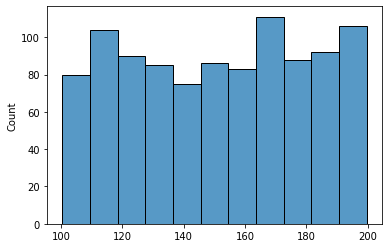

In [56]:
sns.histplot(population);

In [107]:
def plot_sampling_distribution(population, sample_size) : 
    sample_mean = []
    for i in range(1000) : 
        sample = []
        for j in range(sample_size) : 
            random_number = random.randint(0 , len(population)-1)
            sample.append(population[random_number])

        sample_mean.append(np.mean(sample))

    return sns.histplot(sample_mean);

#### Sample size #10

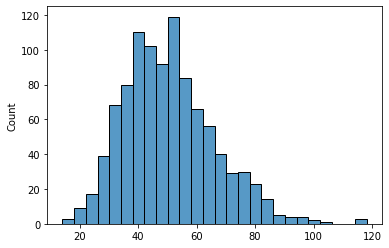

In [108]:
plot_sampling_distribution(population,10);

#### Sample size #20

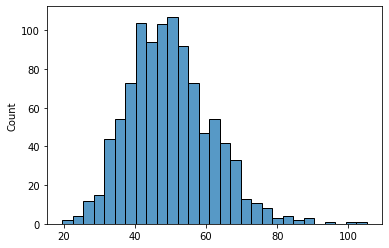

In [109]:
plot_sampling_distribution(population,20);

#### Sample size #30

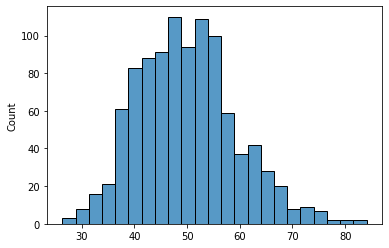

In [110]:
plot_sampling_distribution(population,30);

#### Sample size #100

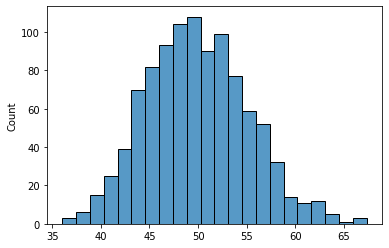

In [111]:
plot_sampling_distribution(population,100);

##### Population exponential 

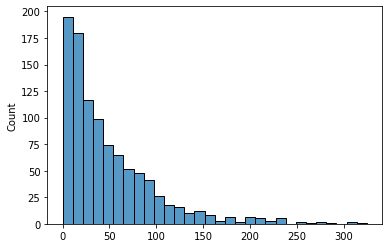

In [112]:
population_exp = exponential(scale = 50, size = 1000)

sns.histplot(population_exp);

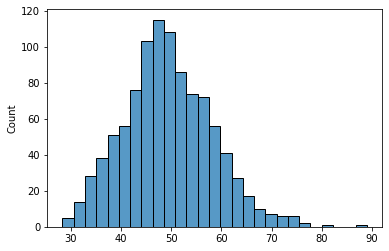

In [113]:
plot_sampling_distribution(population_exp,30);

##### Population geometric 

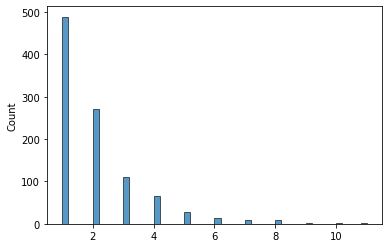

In [77]:
population_geom = geometric(p = 0.5, size = 1000)

sns.histplot(population_geom);

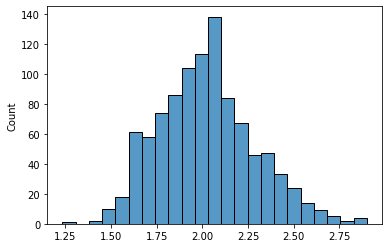

In [114]:
plot_sampling_distribution(population_geom,30);

### Standard error

standard error reduces as the sample size increases 

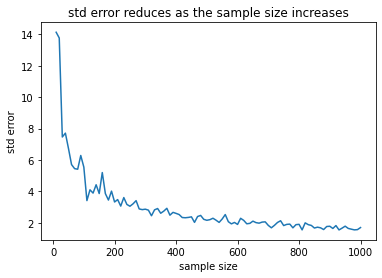

In [101]:
population = exponential(scale= 50, size = 10000)

std_error, sample_size_list = [], []
for i in range(100) : 
    sample = []
    for sample_size in range(10+(i*10)) : 
        random_index = random.randint(0, len(population)-1)
        sample.append(population[random_index])
    std_error.append(np.std(sample)/math.sqrt(10+(i*10)))
    sample_size_list.append(10+(i*10))

plt.plot(sample_size_list, std_error);
plt.xlabel('sample size'); 
plt.ylabel('std error'); 
plt.title('std error reduces as the sample size increases');

#### Mean of sampling distribution

* mean of sampling distribution of mean from a normal population = mean(population)
* std of sampling distribution of mean from a normal population = std(population)/pow(sample_size, 0.5)

std of sampling distribution < std of population

In [23]:
population_norm = normal(loc = 5, scale = 2, size = 1000000)
print(f'population mean --> {np.mean(population_norm)}')
print(f'population std --> {np.std(population_norm)}')

population mean --> 5.000026199322417
population std --> 2.0005370568642, 0.0020005370568642


In [30]:
def create_sampling_distribution_of_mean(population, n_samples = 1000, sample_size = 30) : 
    sampling_distribution = []
    for i in range(n_samples) : 
        sample = []
        for j in range(sample_size) : 
            index = random.randint(0, len(population) - 1)
            sample.append(population[index])

        sampling_distribution.append(np.mean(sample))

    return sampling_distribution

sampling_distribution = create_sampling_distribution_of_mean(population_norm, sample_size= 100)
print(f'mean of sampling distribution {np.mean(sampling_distribution)}')
print(f'mean of sampling distribution {np.std(sampling_distribution)}, {np.std(population_norm)/pow(100, 0.5)}')

mean of sampling distribution 4.9962724224565465
mean of sampling distribution 0.19978662174542342, 0.20005370568642
